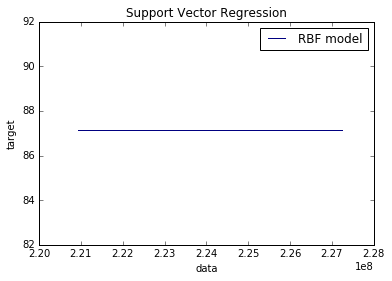

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.externals import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
FI = pd.read_csv("IM_test.csv")
FI.head()
import datetime
FI['Date'] = FI['Date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
FI['NEW_SECONDS'] = FI['Date'].apply(lambda x: (x-datetime.datetime(2010,1,1)).total_seconds())
sum_fin = FI['NEW_SECONDS']
sum_fin.to_csv("FAI_test_Seconds.csv")
clf = joblib.load('IM.pkl')
X =  FI['NEW_SECONDS'].values
X = X.reshape(-1, 1)

val = clf.predict(X)

#plt.scatter(X, val, color='darkorange', label='data')
plt.hold('on')
plt.plot(X, val, color='navy', label='RBF model')
#plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
#plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

d_f_S = {"ID": FI.ID,"Contacts":val}
dfff = pd.DataFrame(data=d_f_S)
dfff.head()
dfff.to_csv("sol_IM.csv",index=False)